# Árboles de decisión de regresión

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

from sklearn.tree import plot_tree
from sklearn import tree

In [ ]:
data_frame = pd.read_csv("turbines_df.csv")
data_frame.head()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date,province_territory,model
0,150,23.0,30.0,1993,Alberta,Other
1,600,44.0,40.0,1997,Alberta,Other
2,600,44.0,50.0,1998,Alberta,Other
3,600,44.0,50.0,1998,Alberta,Other
4,600,44.0,50.0,1998,Alberta,Other


In [ ]:
data_frame.shape

(6478, 6)

In [ ]:
data_frame.dtypes

turbine_capacity        int64
rotor_diameter_m      float64
hub_height_m          float64
commissioning_date      int64
province_territory     object
model                  object
dtype: object

In [ ]:
# Valores nulos
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6478 entries, 0 to 6477
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   turbine_capacity    6478 non-null   int64  
 1   rotor_diameter_m    6478 non-null   float64
 2   hub_height_m        6478 non-null   float64
 3   commissioning_date  6478 non-null   int64  
 4   province_territory  6478 non-null   object 
 5   model               6478 non-null   object 
dtypes: float64(2), int64(2), object(2)
memory usage: 303.8+ KB


---
**INTERPRETACIÓN**

---
Se aprecia inexistencia de valores nulos

In [ ]:
# Valores únicos
for feature in data_frame.describe(include="object").columns:
    print('Valores únicos de', feature, '=', data_frame[feature].unique())

Valores únicos de province_territory = ['Alberta' 'British Columbia' 'Manitoba' 'New Brunswick'
 'Newfoundland and Labrador' 'Other' 'Nova Scotia' 'Ontario'
 'Prince Edward Island' 'Quebec' 'Saskatchewan']
Valores únicos de model = ['Other' 'V47/660' 'GE 1.5SLE' 'GE 1.6-100' 'V90/1800' 'SWT 2.3-101'
 'E-82' 'V82/1650' 'MM92' 'MM82' 'V80']


In [ ]:
# Medidas estadísticas
data_frame.describe()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date
count,6478.000000,6478.000000,6478.000000,6478.000000
mean,1967.307194,88.203520,82.790908,2011.019142
std,605.933839,16.566686,14.366232,4.340453
min,65.000000,15.000000,24.500000,1993.000000
25%,1600.000000,77.000000,80.000000,2009.000000
50%,1880.000000,90.000000,80.000000,2012.000000
75%,2300.000000,100.000000,85.000000,2014.000000
max,3750.000000,141.000000,132.000000,2019.000000


---
**INTERPRETACIÓN**

---

+ La capacidad de la turbina es, en promedio, de 1967
+ El 75% de las turbinas posee una capacidad igual o inferior a 2300.
+ La capacidad máxima de las turbinas asciende a 3750


In [ ]:
# Considerando solo las columnas de tipo object
data_frame.describe(include="object")

,province_territory,model
count,6478,6478
unique,11,11
top,Ontario,Other
freq,2443,2789


---
**INTERPRETACIÓN**

---

+ Existen 11 provincias o ubicaciones distintas, siendo la más popular la de Ontario.
+ Exixten 11 modelos distintos de turbinas, siendo el más popular Other.

# Análisis de la variable objetivo (capacidad de la turbina)

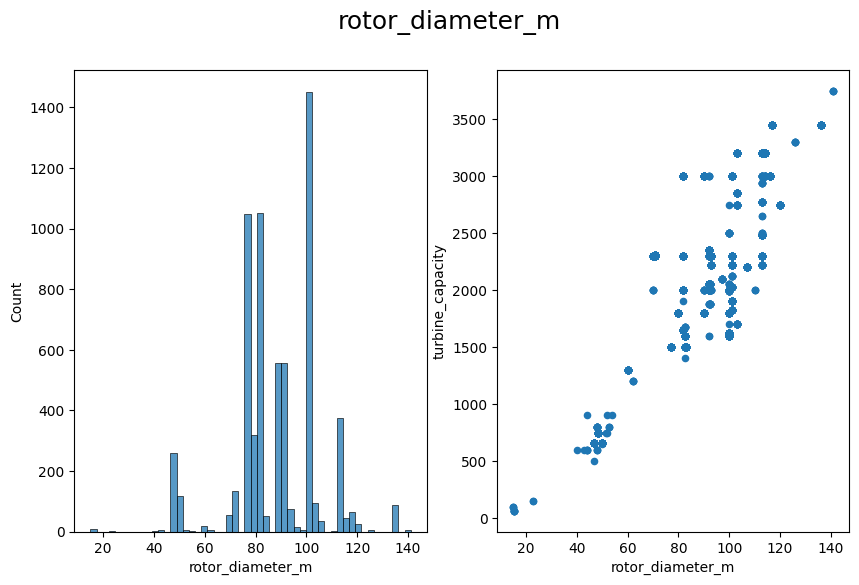

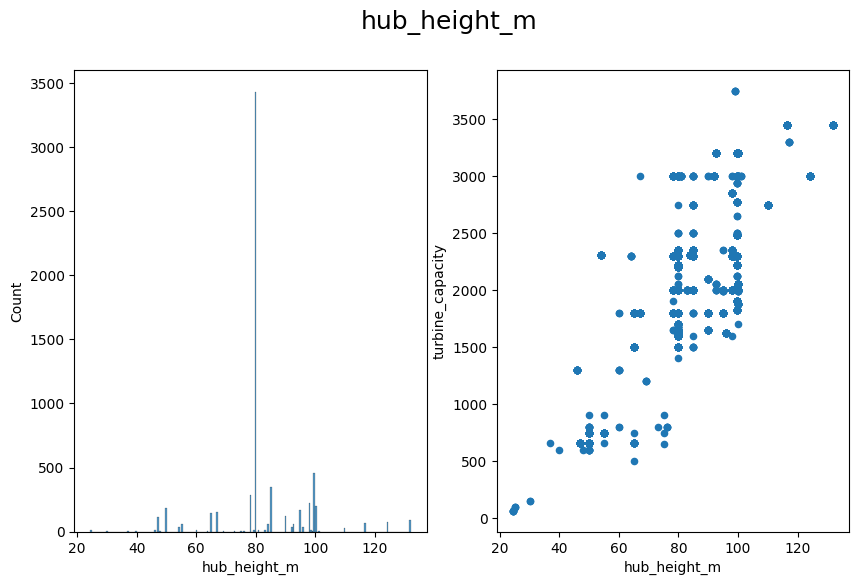

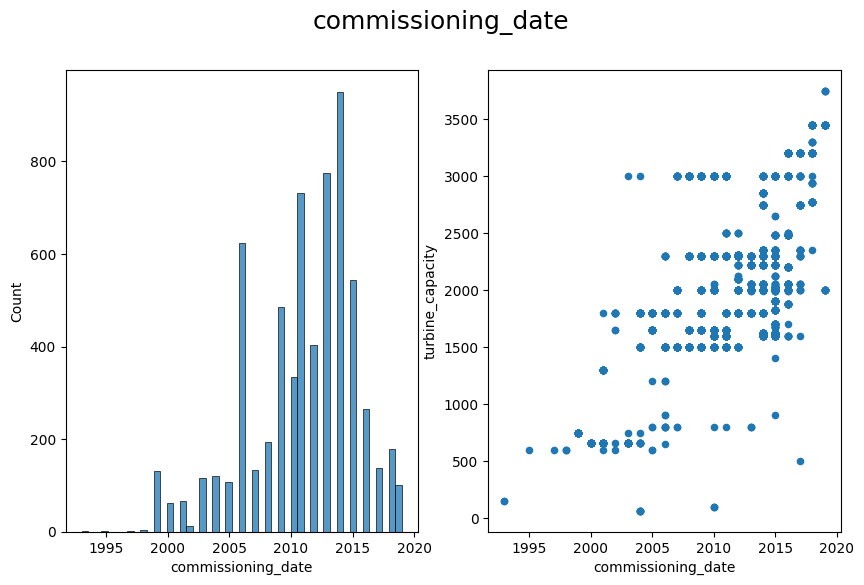

In [ ]:
for col in ['rotor_diameter_m','hub_height_m', 'commissioning_date']:
    fig, ax =plt.subplots(1, 2, figsize=(10, 6))
    fig.suptitle(col, fontsize=18)
    sns.histplot(data_frame[col], ax=ax[0], kde=False)
    data_frame[[col]+['turbine_capacity']].plot.scatter(x=col, y='turbine_capacity', ax=ax[1])
    plt.show()

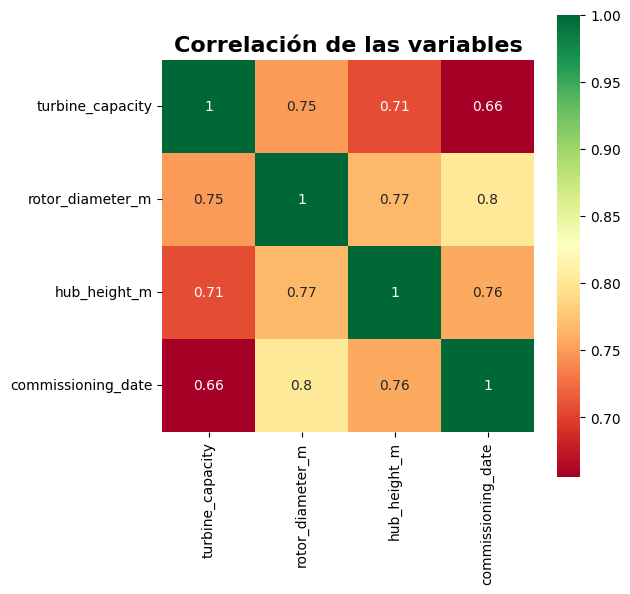

In [ ]:
## Correlación de las variables
plt.figure(figsize=(6,6))
p=sns.heatmap(data_frame[data_frame.describe().columns].corr(), annot=True, cmap='RdYlGn',square=True)
plt.title("Correlación de las variables", fontsize=16, fontweight="bold");

In [ ]:
# Solo los índices de correlación
data_frame.corr()

<ipython-input-19-1c513509d5ca>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data_frame.corr()


,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date
turbine_capacity,1.000000,0.748754,0.706078,0.655726
rotor_diameter_m,0.748754,1.000000,0.767204,0.803347
hub_height_m,0.706078,0.767204,1.000000,0.757478
commissioning_date,0.655726,0.803347,0.757478,1.000000


# Modelo de Machine Learning

A continuación se creará un modelo predictivo para determinar la capacidad de la turbina en función de 2 de sus características:

+ Diámetro de su rotor
+ Altura de su hub

Dada la naturaleza de la variable respuesta (se trata de una variable continua) se debe seleccionar un algoritmo de regresión, en este caso, se trabaja con DecisionTreeRegressor

In [ ]:
X = data_frame[['rotor_diameter_m','hub_height_m']]
y = data_frame.turbine_capacity

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en entrenamiento)', modelo.score(X_train, y_train)))
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en validación)', modelo.score(X_test, y_test)))

Precisión del modelo (en entrenamiento)  = 0.8249
Precisión del modelo (en validación)     = 0.8342


In [ ]:
# Guarda resultados para comparar
history_mae, history_score = [], []
history_mae.append(mean_absolute_error(y_test, y_pred))
history_score.append(r2_score(y_test, y_pred))

## Representación gráfica del árbol

Profundidad del árbol: 5
Número de nodos terminales: 26


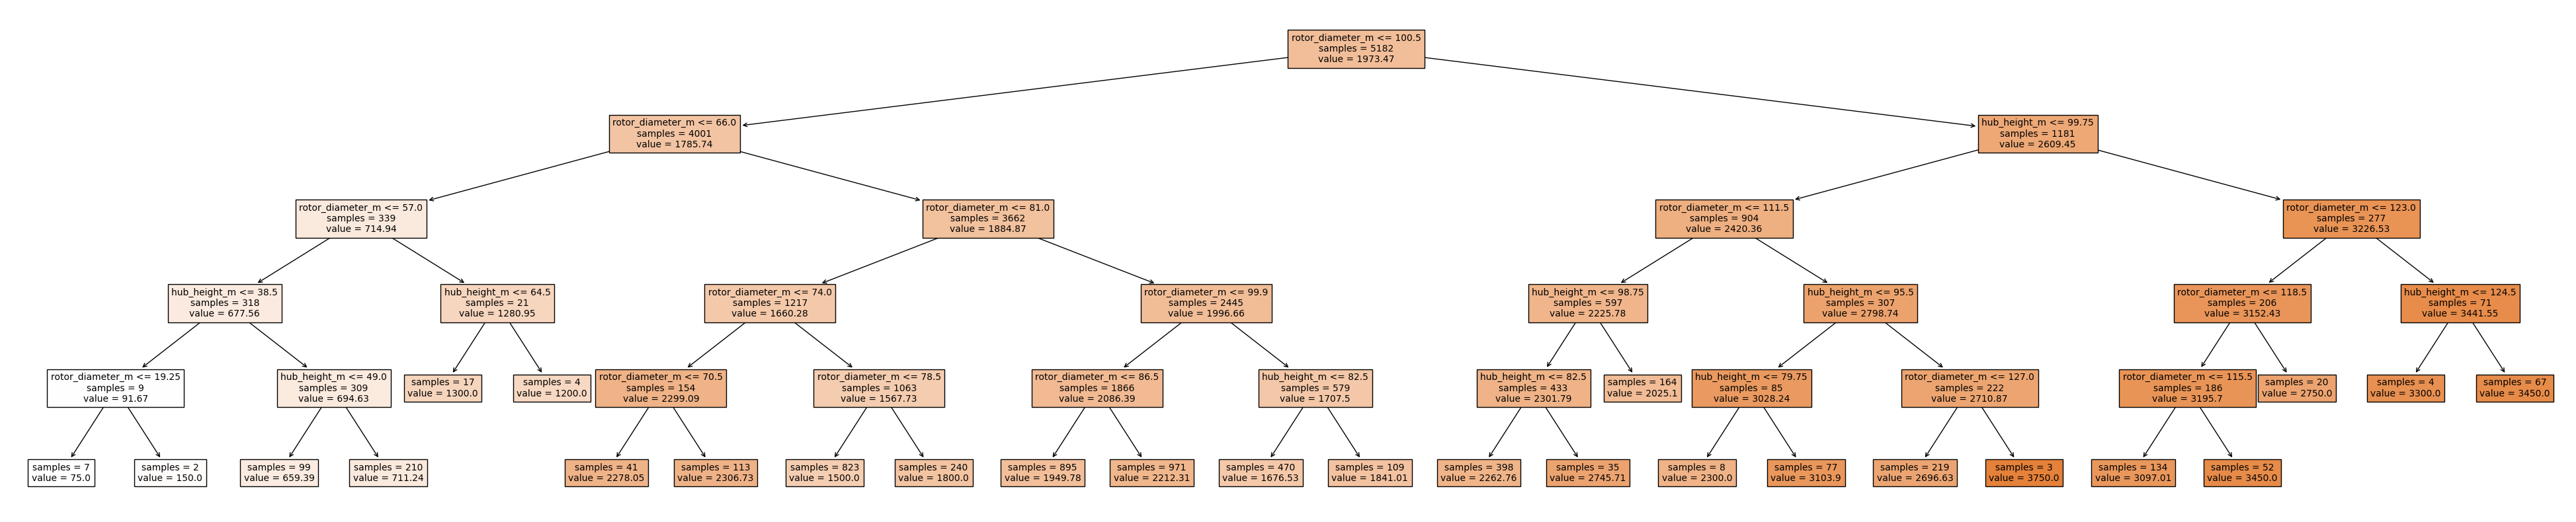

In [ ]:
fig, ax = plt.subplots(figsize=(50, 10))

print(f"Profundidad del árbol: {modelo.get_depth()}")
print(f"Número de nodos terminales: {modelo.get_n_leaves()}")

plot = plot_tree(
          decision_tree = modelo,
          feature_names = data_frame.drop(columns = ["province_territory", "model", "turbine_capacity"]).columns,
          class_names   = 'turbine_capacity',
          filled        = True,
          impurity      = False,
          fontsize      = 10,
          precision     = 2,
          ax            = ax
     )

In [ ]:
# Arbol como "texto"
print(tree.export_text(modelo, feature_names=list(X.columns)))

|--- rotor_diameter_m <= 100.50
|   |--- rotor_diameter_m <= 66.00
|   |   |--- rotor_diameter_m <= 57.00
|   |   |   |--- hub_height_m <= 38.50
|   |   |   |   |--- rotor_diameter_m <= 19.25
|   |   |   |   |   |--- value: [75.00]
|   |   |   |   |--- rotor_diameter_m >  19.25
|   |   |   |   |   |--- value: [150.00]
|   |   |   |--- hub_height_m >  38.50
|   |   |   |   |--- hub_height_m <= 49.00
|   |   |   |   |   |--- value: [659.39]
|   |   |   |   |--- hub_height_m >  49.00
|   |   |   |   |   |--- value: [711.24]
|   |   |--- rotor_diameter_m >  57.00
|   |   |   |--- hub_height_m <= 64.50
|   |   |   |   |--- value: [1300.00]
|   |   |   |--- hub_height_m >  64.50
|   |   |   |   |--- value: [1200.00]
|   |--- rotor_diameter_m >  66.00
|   |   |--- rotor_diameter_m <= 81.00
|   |   |   |--- rotor_diameter_m <= 74.00
|   |   |   |   |--- rotor_diameter_m <= 70.50
|   |   |   |   |   |--- value: [2278.05]
|   |   |   |   |--- rotor_diameter_m >  70.50
|   |   |   |   |   |--- va

## Algunas lecturas del árbol

+ El valor que aparece en el nodo raíz asociado a sampes (5182) corresponde a la cantidad de muestras usadas en el entrenamiento:

```
X_train.shape[0]
```
+ Las condiciones de cada nodo están en función de las variables predictoras (incluidas en el modelo). Se puede comprobar:


```
modelo.feature_names_in_
```
+ Es posible conocer la importancia de cada variable dentro del modelo:



```
modelo.feature_importances_
```





In [ ]:
X_train.shape[0]

5182

In [ ]:
modelo.feature_names_in_

array(['rotor_diameter_m', 'hub_height_m'], dtype=object)

In [ ]:
modelo.feature_importances_

array([0.89169831, 0.10830169])

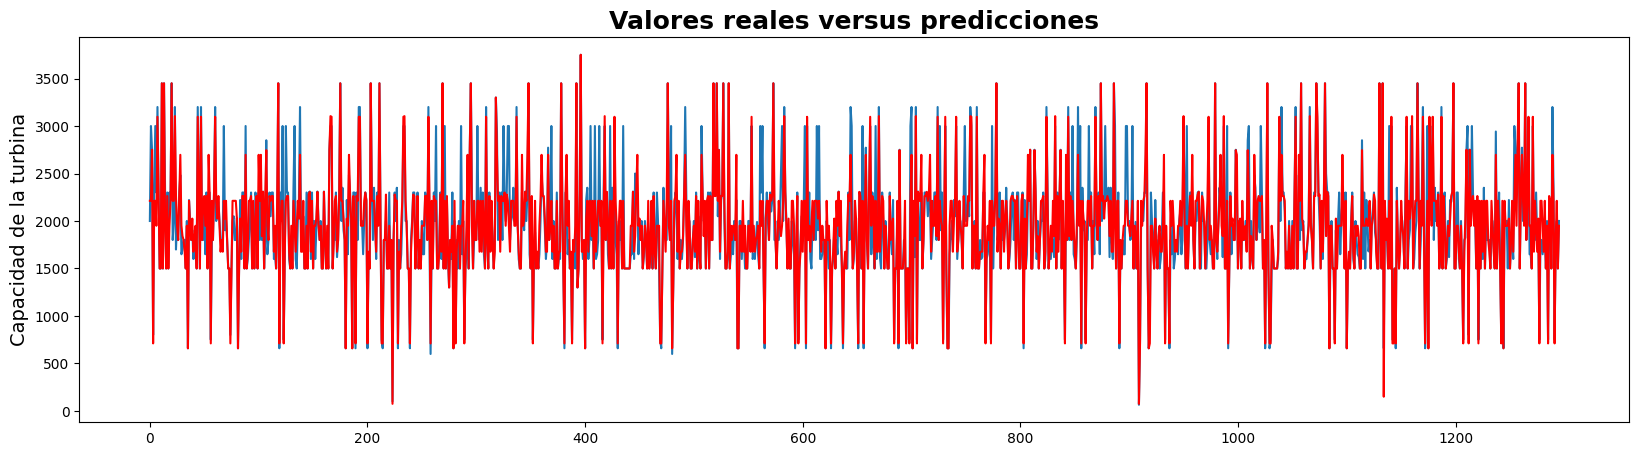

In [ ]:
plt.subplots(figsize=(20,5))

plt.title("Valores reales versus predicciones", fontsize=18, fontweight="bold")
plt.ylabel("Capacidad de la turbina", fontsize=14)
plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_pred).reshape(-1,1), 'r');

In [ ]:
from sklearn.metrics import mean_absolute_error, r2_score
print("{0:<15} : {1:.4f}".format("MAE",mean_absolute_error(y_test, y_pred)))
print("{0:<15} : {1:.4f}".format("Coeficiente R2", r2_score(y_test, y_pred)))

MAE             : 143.9159
Coeficiente R2  : 0.8342


In [ ]:
print(history_mae)
print(history_score)

[143.91585979867102]
[0.83418586620569]


## Predicción con datos nuevos

Cada vez que se construye un modelo predictivo es para poder ponerlo a prueba con datos nuevos

In [ ]:
x_diametro_rotor = 48; x_altura_hub = 105
input = np.array([x_diametro_rotor, x_altura_hub]).reshape(1,-1)
prediccion = modelo.predict(pd.DataFrame(input,columns=X_train.columns))
print("Considerando una turbina con un rotor de diámetro {0} y un hub de altura {1} su capacidad sería de {2}".format(x_diametro_rotor, x_altura_hub, prediccion))

Considerando una turbina con un rotor de diámetro 48 y un hub de altura 105 su capacidad sería de [711.23809524]


# Tratando de mejorar el modelo

Siempre que se construye un modelo se piensa en ***¿se podrá obtener un resultado mejor?***

En este caso se va a generar un modelo considerando todas las variables de las que se dispone como variables predictoras.

In [ ]:
X = data_frame.drop(columns = ["province_territory", "model", "turbine_capacity"])
y = data_frame.turbine_capacity

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("{0:<40} : {1:.4f}".format('Precisión del modelo (en entrenamiento)', modelo.score(X_train, y_train)))
print("{0:<40} : {1:.4f}".format('Precisión del modelo (en validación)', modelo.score(X_test, y_test)))

Precisión del modelo (en entrenamiento)  : 0.8454
Precisión del modelo (en validación)     : 0.8483


In [ ]:
print("{0:<15} : {1:.2f}".format("MAE",mean_absolute_error(y_test, y_pred)))
print("{0:<15} : {1:.4f}".format("Coeficiente R2", r2_score(y_test, y_pred)))

MAE             : 127.01
Coeficiente R2  : 0.8483


***Conclusiones***

Se mejora un poco el coeficiente $R^2$, lo que se justificaría porque el año de la turbina influye en su capacidad por el desgaste que se produce a medida que va perdiendo vida útil.

In [ ]:
history_mae.append(mean_absolute_error(y_test, y_pred))
history_score.append(r2_score(y_test, y_pred))

In [ ]:
print(history_mae)
print(history_score)

[143.91585979867102, 127.00622410297751]
[0.83418586620569, 0.8482790454047076]


## Incluyendo las variables categóricas

In [ ]:
data_frame.province_territory.unique()

array(['Alberta', 'British Columbia', 'Manitoba', 'New Brunswick',
       'Newfoundland and Labrador', 'Other', 'Nova Scotia', 'Ontario',
       'Prince Edward Island', 'Quebec', 'Saskatchewan'], dtype=object)

Dada la naturaleza de la variable categórica que es nominal, entonces se utiliza one-hot encoder

In [ ]:
features_categorical = data_frame.describe(include="object").columns
data_full = data_frame.copy()
data_full = data_full.drop(features_categorical, axis=1)
data_full

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date
0,150,23.0,30.0,1993
1,600,44.0,40.0,1997
2,600,44.0,50.0,1998
3,600,44.0,50.0,1998
4,600,44.0,50.0,1998
...,...,...,...,...
6473,660,47.0,50.0,2001
6474,660,47.0,50.0,2001
6475,660,47.0,50.0,2001
6476,150,23.0,30.0,1993


In [ ]:
# Codifica y agrega al data frame
province_encoder = pd.get_dummies(data_frame.province_territory)
data_full = pd.concat([data_full, province_encoder], axis=1)
data_full.head()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Other,Prince Edward Island,Quebec,Saskatchewan
0,150,23.0,30.0,1993,1,0,0,0,0,0,0,0,0,0,0
1,600,44.0,40.0,1997,1,0,0,0,0,0,0,0,0,0,0
2,600,44.0,50.0,1998,1,0,0,0,0,0,0,0,0,0,0
3,600,44.0,50.0,1998,1,0,0,0,0,0,0,0,0,0,0
4,600,44.0,50.0,1998,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_full.corr()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,Ontario,Other,Prince Edward Island,Quebec,Saskatchewan
turbine_capacity,1.000000,0.748754,0.706078,0.655726,-0.215483,0.175298,-0.005753,0.149396,0.006220,0.014747,0.089143,-0.015024,-0.002108,-0.025848,-0.100025
rotor_diameter_m,0.748754,1.000000,0.767204,0.803347,-0.205064,0.130642,0.020695,0.000401,-0.090185,-0.025879,0.357682,-0.053677,-0.057548,-0.203266,-0.122070
hub_height_m,0.706078,0.767204,1.000000,0.757478,-0.349243,0.105822,-0.028128,-0.010333,-0.095635,0.012375,0.299209,-0.061378,-0.069021,-0.006642,-0.155895
commissioning_date,0.655726,0.803347,0.757478,1.000000,-0.233663,0.107561,-0.110496,-0.037155,-0.049973,0.031670,0.181648,-0.029365,-0.084329,0.046244,-0.146605
Alberta,-0.215483,-0.205064,-0.349243,-0.233663,1.000000,-0.087271,-0.058156,-0.054949,-0.025987,-0.090051,-0.312552,-0.012230,-0.051309,-0.267571,-0.062474
British Columbia,0.175298,0.130642,0.105822,0.107561,-0.087271,1.000000,-0.031455,-0.029721,-0.014056,-0.048707,-0.169054,-0.006615,-0.027752,-0.144725,-0.033791
Manitoba,-0.005753,0.020695,-0.028128,-0.110496,-0.058156,-0.031455,1.000000,-0.019806,-0.009367,-0.032458,-0.112655,-0.004408,-0.018494,-0.096442,-0.022518
New Brunswick,0.149396,0.000401,-0.010333,-0.037155,-0.054949,-0.029721,-0.019806,1.000000,-0.008850,-0.030668,-0.106443,-0.004165,-0.017474,-0.091125,-0.021276
Newfoundland and Labrador,0.006220,-0.090185,-0.095635,-0.049973,-0.025987,-0.014056,-0.009367,-0.008850,1.000000,-0.014504,-0.050339,-0.001970,-0.008264,-0.043095,-0.010062
Nova Scotia,0.014747,-0.025879,0.012375,0.031670,-0.090051,-0.048707,-0.032458,-0.030668,-0.014504,1.000000,-0.174441,-0.006826,-0.028636,-0.149337,-0.034868


+ Se aprecia que la provincia no tiene mucha influencia en la capacidad de la turbina

In [ ]:
# Codifica y agrega al data frame
model_encoder = pd.get_dummies(data_frame.model)
data_full = pd.concat([data_full, model_encoder], axis=1)
data_full.head()

,turbine_capacity,rotor_diameter_m,hub_height_m,commissioning_date,Alberta,British Columbia,Manitoba,New Brunswick,Newfoundland and Labrador,Nova Scotia,...,GE 1.5SLE,GE 1.6-100,MM82,MM92,Other,SWT 2.3-101,V47/660,V80,V82/1650,V90/1800
0,150,23.0,30.0,1993,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,600,44.0,40.0,1997,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,600,44.0,50.0,1998,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,600,44.0,50.0,1998,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,600,44.0,50.0,1998,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


+ Se aprecia una correlación muy baja por lo que se sospecha que incluirla podría significar una mejora poco considerable.
+ Sin embargo, una de las características que tienen los árboles de decisión es que son capaces de asignarle importancia a las características (revise una de las celdas anteriores); así es que veremos cuál es el rendimiento de un modelo construido sobre un árbol de decisión de regresión considerando todas las caracterìsticas cuantitativas con las que se cuenta

In [ ]:
features = data_full.describe().columns.difference(['turbine_capacity'])
X = data_full[features]
y = data_full.turbine_capacity

# Separar los datos de "train" en entrenamiento y prueba para probar el modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
modelo = DecisionTreeRegressor(max_depth = 5, random_state = 29)

# Entrenamiento del modelo
modelo.fit(X_train, y_train)

# Validación del modelo
y_pred = modelo.predict(X_test)

# Evaluación del modelo
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en entrenamiento):', modelo.score(X_train, y_train)))
print("{0:<40} = {1:.4f}".format('Precisión del modelo (en validación):', modelo.score(X_test, y_test)))
print("{0:<40} = {1:.4f}".format("MAE : ",mean_absolute_error(y_test, y_pred)))
print("{0:<40} = {1:.4f}".format("Coeficiente R2 :", r2_score(y_test, y_pred)))

Precisión del modelo (en entrenamiento): = 0.8314
Precisión del modelo (en validación):    = 0.8405
MAE :                                    = 132.5918
Coeficiente R2 :                         = 0.8405


In [ ]:
history_mae.append(mean_absolute_error(y_test, y_pred))
history_score.append(r2_score(y_test, y_pred))
# Muestra los resultados acumulados
print(history_mae)
print(history_score)

[143.91585979867102, 127.00622410297751, 132.59176909253222]
[0.83418586620569, 0.8482790454047076, 0.8405483849635018]


+ Se logra aumentar el coeficiente $R^{2}$ y se disminuye el MAE (comparado con el modelo inicial)
+ Veamos ahora cuál fue la importancia que le da a las variables

In [ ]:
pd.DataFrame(modelo.feature_importances_.reshape(-1, 1),
             index = modelo.feature_names_in_, columns = ['importancia']).importancia.sort_values(ascending = False)

rotor_diameter_m             0.707431
commissioning_date           0.131844
GE 1.5SLE                    0.094137
Ontario                      0.039778
hub_height_m                 0.020936
GE 1.6-100                   0.005530
Quebec                       0.000289
New Brunswick                0.000055
V90/1800                     0.000000
V82/1650                     0.000000
V80                          0.000000
V47/660                      0.000000
Saskatchewan                 0.000000
SWT 2.3-101                  0.000000
Alberta                      0.000000
Prince Edward Island         0.000000
Other                        0.000000
British Columbia             0.000000
Nova Scotia                  0.000000
Newfoundland and Labrador    0.000000
Manitoba                     0.000000
MM92                         0.000000
MM82                         0.000000
E-82                         0.000000
Other                        0.000000
Name: importancia, dtype: float64

---
**Interpretación**

---
La tabla anterior indica que las variables importantes para el modelo son aquellas que tienen un valor mayor a cero, indicando el valor la magntud de la importancia.

Dado el comentario anterior, las 2 variables más importantes son el diamétro del rotor y el año de la turbina.

# Gráficos de experimentación

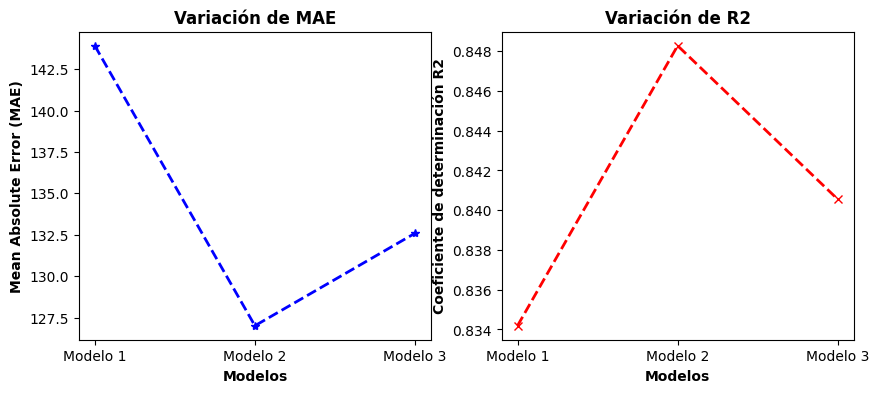

In [ ]:
# Gráficos de experimentación de los modelos
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3']
fig, axs = plt.subplots(1, 2,figsize=(10,4))

axs[0].plot(modelos, history_mae, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[0].set_ylabel("Mean Absolute Error (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variación de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_score, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[1].set_ylabel("Coeficiente de determinación R2", fontsize=10, fontweight="bold")
axs[1].set_title("Variación de R2", fontsize=12, fontweight="bold");

---
**Conclusiones**

---
+ Considerando el modelo base (modelo 1) se obtiene un mejor $R^2$ usando el modelo 2, sin embargo baja el MAE
+ Usando el modelo 3, se disminuye el MAE y se aumenta el coeficiente de determinación ($R^2$); sin embargo, los resultados son más bajos que el modelo 2.


## Comparando algoritmos

A continuación se crea un modelo predictivo de la capacidad de la turbina usando la regresión lineal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=29)
# Creación de modelo
modelo_x = LinearRegression()
# Entrenamiento del modelo
modelo_x.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo_x.predict(X_test)

In [ ]:
# Evaluación del modelo
print("R2 : %.5f" % r2_score(y_test, y_pred))
print("MSE: %.2f" % mean_squared_error(y_pred, y_test))
print("MAE: %.2f" % mean_absolute_error(y_pred, y_test))
print("Score del modelo en entrenamiento : %.2f" % modelo_x.score(X_train, y_train))
print("Score del modelo en test : %.5f" % modelo_x.score(X_test, y_test))

R2 : 0.76272
MSE: 84462.61
MAE: 201.85
Score del modelo en entrenamiento : 0.75
Score del modelo en test : 0.76272


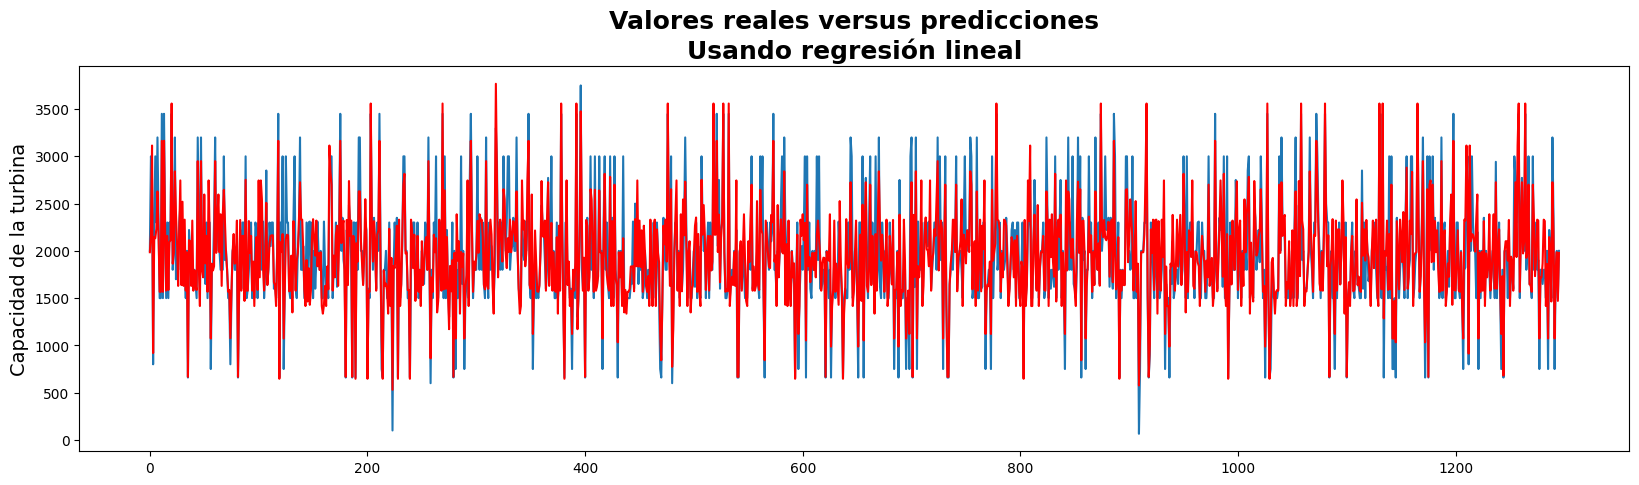

In [ ]:
plt.subplots(figsize=(20,5))

plt.title("Valores reales versus predicciones\nUsando regresión lineal", fontsize=18, fontweight="bold")
plt.ylabel("Capacidad de la turbina", fontsize=14)
plt.plot(np.array(y_test).reshape(-1,1))
plt.plot(np.array(y_pred).reshape(-1,1), 'r');

In [ ]:
history_mae.append(mean_absolute_error(y_test, y_pred))
history_score.append(r2_score(y_test, y_pred))
# Muestra los resultados acumulados
print(history_mae)
print(history_score)

[143.91585979867102, 127.00622410297751, 132.59176909253222, 201.85304932920408]
[0.83418586620569, 0.8482790454047076, 0.8405483849635018, 0.7627248373669431]


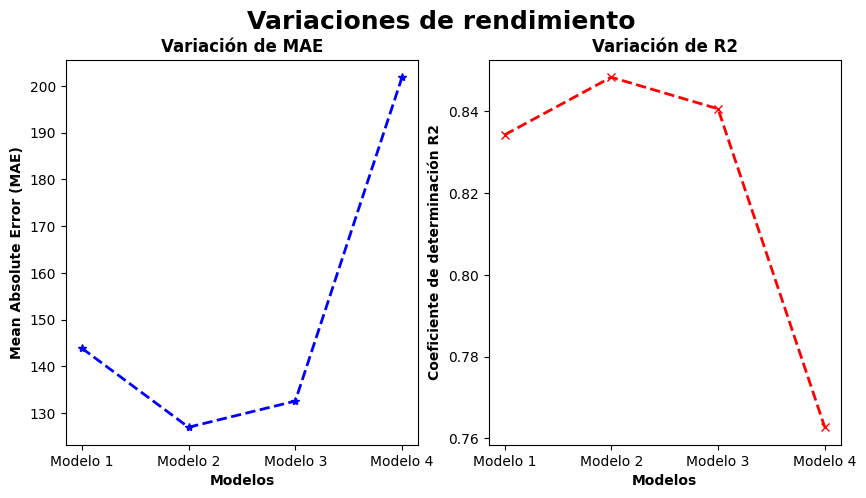

In [ ]:
# Gráficos de experimentación de los modelos
modelos = ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4']
fig, axs = plt.subplots(1, 2,figsize=(10,5))

plt.suptitle("Variaciones de rendimiento", fontsize=18, fontweight="bold")
axs[0].plot(modelos, history_mae, 'b*--', linewidth=2)
axs[0].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[0].set_ylabel("Mean Absolute Error (MAE)", fontsize=10, fontweight="bold")
axs[0].set_title("Variación de MAE", fontsize=12, fontweight="bold")

axs[1].plot(modelos, history_score, 'rx--', linewidth=2, markersize=6)
axs[1].set_xlabel("Modelos", fontsize=10, fontweight="bold")
axs[1].set_ylabel("Coeficiente de determinación R2", fontsize=10, fontweight="bold")
axs[1].set_title("Variación de R2", fontsize=12, fontweight="bold");

# Conclusiones finales

+ El árbol de decisión ofrece mejores rendimientos en comparación con la regresión lineal.


# Trabajo futuro

+ Usando el modelo construido en base al árbol de decisión: genere variantes considerando la estandarización: documente y comente las diferencias en los resultados.

+ Investigue acerca de los otros parámetros que tiene el árbol de decisión en la documentación oficial y experimente generando nuevos modelos usando/cambiando algunos de estos parámetros. La documentación oficial está [acá](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). Deberá documentar y comentar los resultados obtenidos.

+ En función de su investigación/experimentación de los pasos anteriores se procederá a aplicar la evaluación teórica correspondiente a esta primera unidad el día **VIERNES 20 DE OCTUBRE**